<a href="https://colab.research.google.com/github/Rimcode-ai/MLmodelPredict-Heart-Failure-Prediction-Dataset/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Download latest version
dataset_path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file
data = pd.read_csv(csv_file_path)
print(data.head())

100%|██████████| 8.56k/8.56k [00:00<00:00, 11.0MB/s]

Extracting files...
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Columns and their data types:
 Age                    int64
RestingBP              int64
Cholesterol            int64
MaxHR                  int64
ExerciseAngina        object
Oldpeak              float64
ST_Slope              object
HeartDisease           int64
Sex_M                   bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
FastingBS_1             bool
dtype: object
Non-numeric columns detected: Index(['ExerciseAngina', 'ST_Slope'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8586956521739131

Confusion Matrix:
[[68  9]
 [17 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



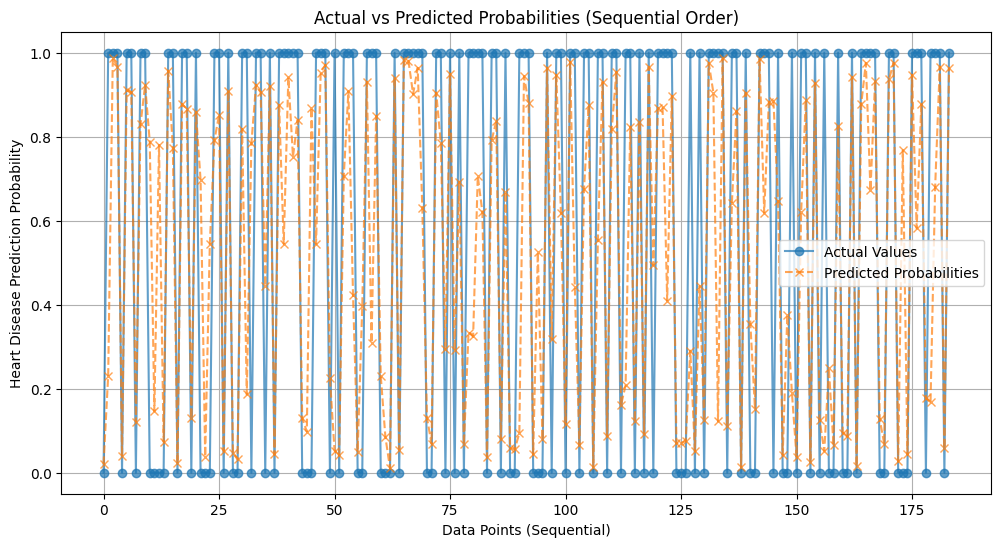

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check column data types
print("Columns and their data types:\n", data.dtypes)

# Convert non-numeric columns if any
non_numeric_columns = data.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns detected:", non_numeric_columns)
    # For now, convert them to numeric using get_dummies
    data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

# Define features (X) and target variable (y)
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Prepare data for visualization
test_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred, 'Predicted_Probabilities': y_pred_prob})
test_results = test_results.sort_index()  # Sort by index to maintain sequence

# Plot actual vs predicted results sequentially
plt.figure(figsize=(12, 6))
plt.plot(test_results['Actual'], label='Actual Values', marker='o', linestyle='-', alpha=0.7)
plt.plot(test_results['Predicted_Probabilities'], label='Predicted Probabilities', marker='x', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Probabilities (Sequential Order)')
plt.xlabel('Data Points (Sequential)')
plt.ylabel('Heart Disease Prediction Probability')
plt.legend()
plt.grid(True)
plt.show()